## Diameter test




Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


Cellpose version: 4.0.1 (major number: 4)


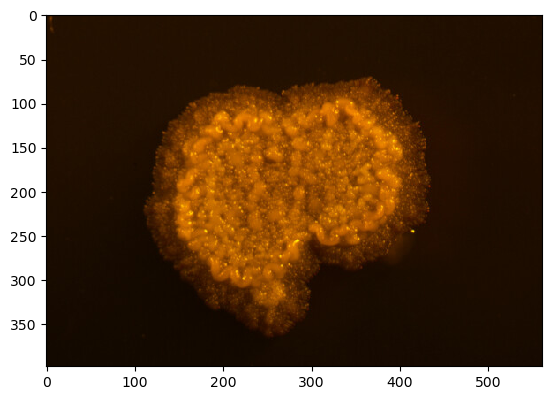

In [1]:
import random
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import cellpose
from cellpose import models, io
try:
    from tnia.plotting.plt_helper import random_label_cmap
    cmap = random_label_cmap()
except ImportError:
    cmap = None

parent_folder = r"D:\images\tnia-python-images\imagesc\2025_09_09_large_biofilm"
name = 'image.tif'

name_without_extension = name.split('.')[0]
image = imread(os.path.join(parent_folder, name))

plt.imshow(image, cmap='gray')

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

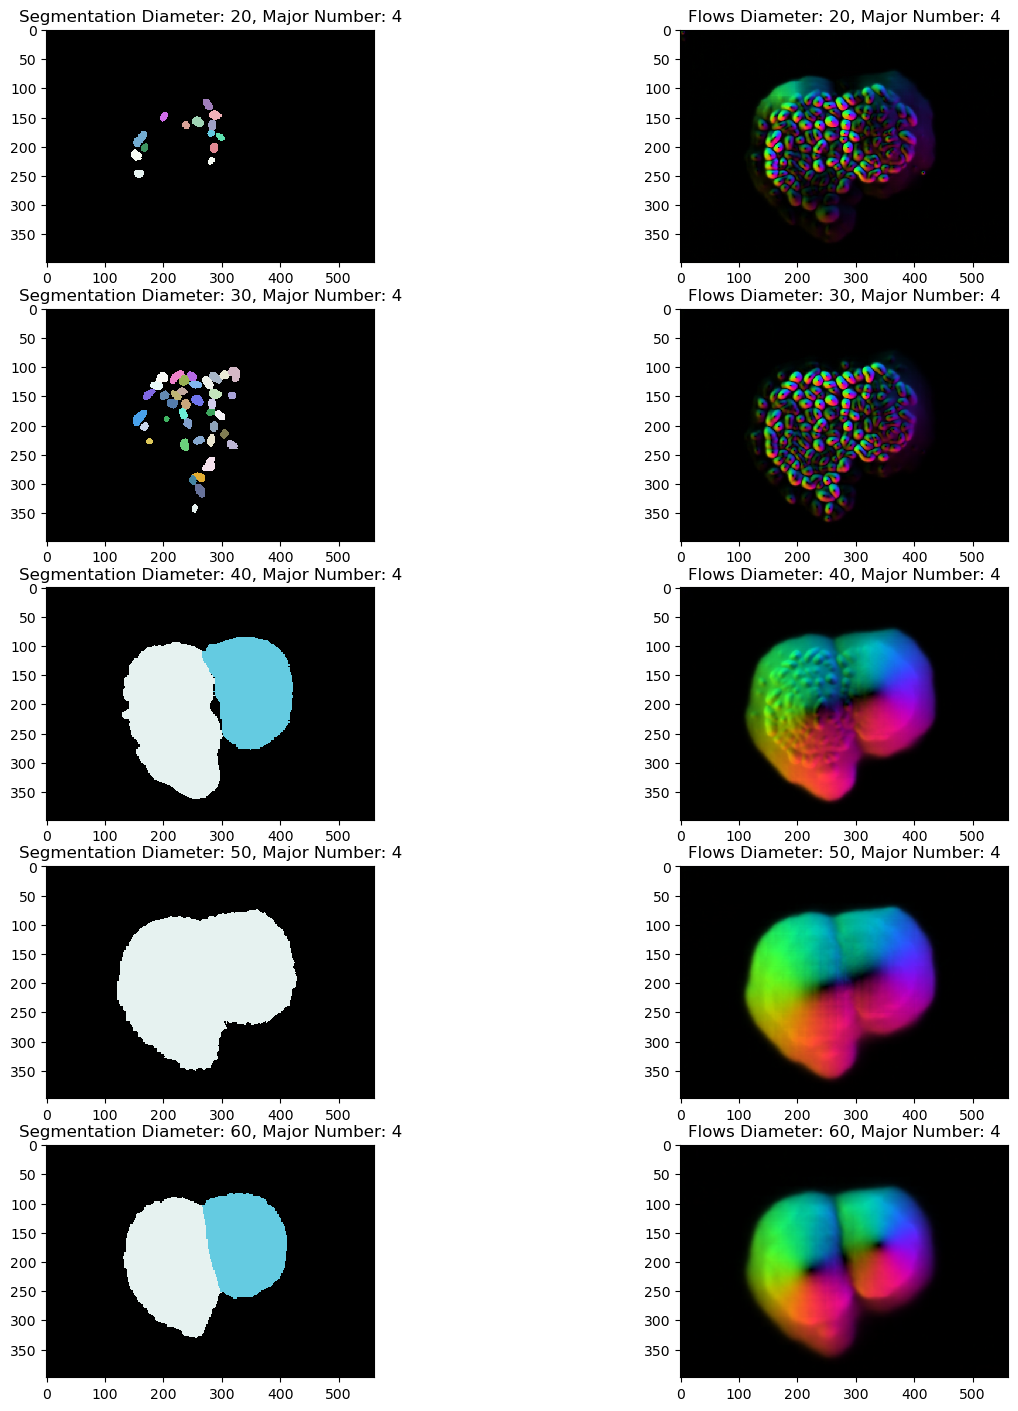

In [10]:
if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto3')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)

niter = 2000
diameters = [20, 30, 40, 50, 60]

fig, axes = plt.subplots(len(diameters), 2, figsize=(15, len(diameters) * 3.5))

for row, d in enumerate(diameters):
    result = model.eval(image, diameter=d, niter=niter)


    axes[row,0].imshow(result[0], cmap=cmap)
    axes[row,0].set_title(f"Segmentation Diameter: {d}, Major Number: {major_number}")
    axes[row,1].imshow(result[1][0])
    axes[row,1].set_title(f"Flows Diameter: {d}, Major Number: {major_number}")

fig.savefig(os.path.join(parent_folder, f'cellpose_diameter_{name_without_extension}_{cellpose.version}_niter_{niter}.png'), dpi=300, bbox_inches='tight')